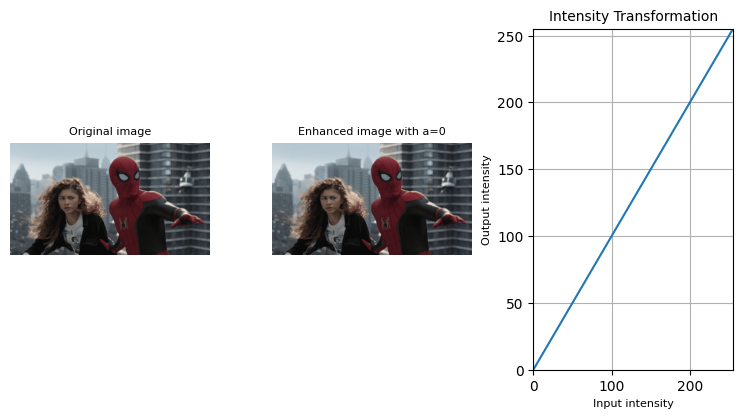

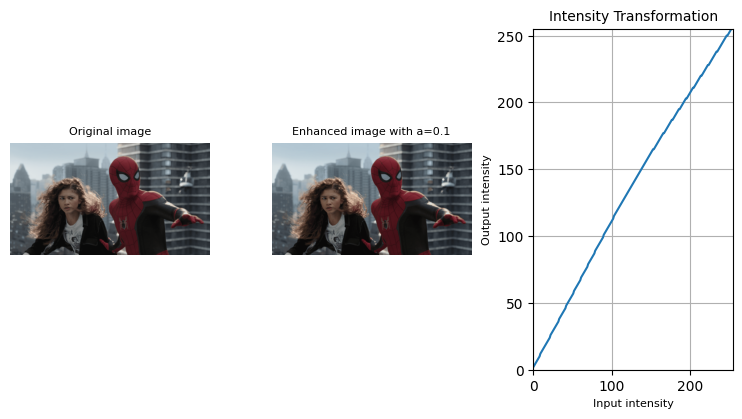

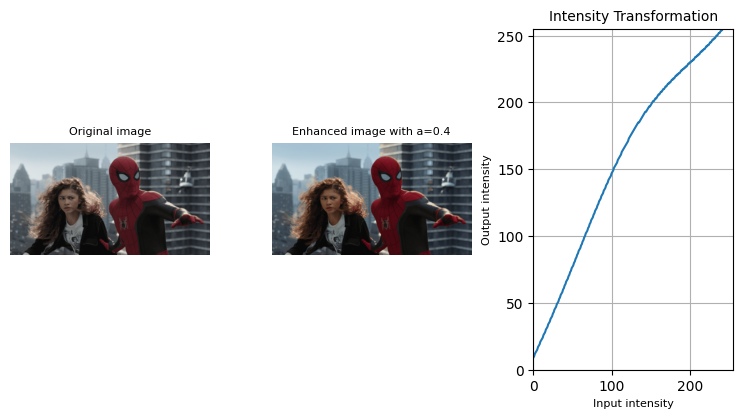

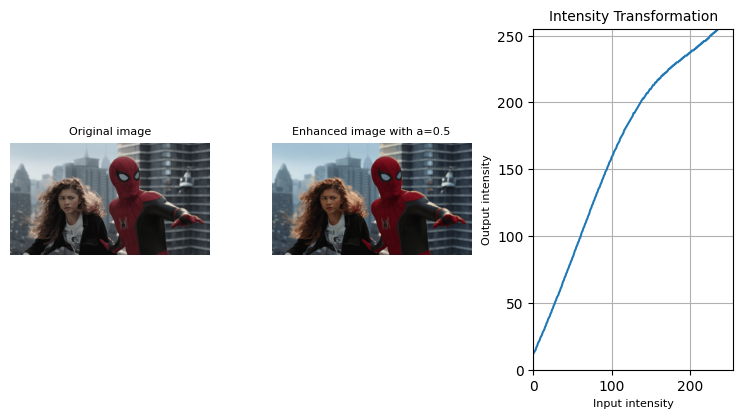

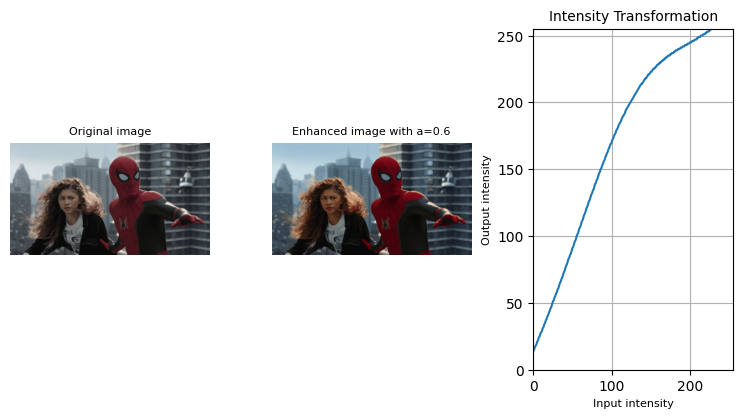

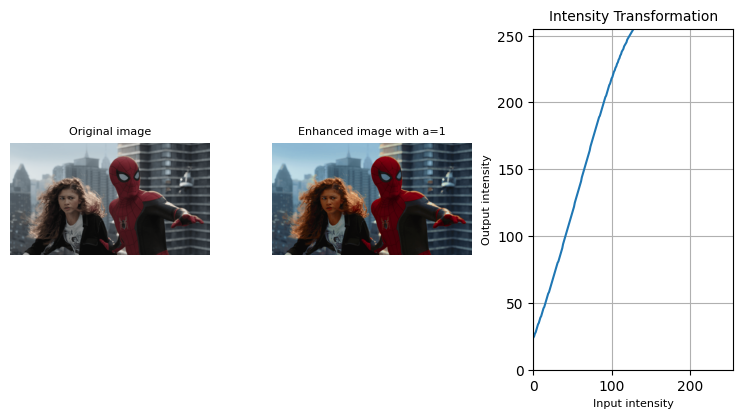

In [36]:
#q4
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

im = cv.imread('images/spider.png', cv.IMREAD_COLOR)
assert im is not None

img = cv.cvtColor(im, cv.COLOR_BGR2HSV)  # transform to hsv plane

h ,s,v = cv.split(img)         # split them into saturation , hue , value
it =np.zeros(256).astype(np.uint8)                   
ts =np.zeros_like(s)           # array to store value modifyfor saturation plane
ar = [0,.1,.4,.5,.6,1]

for a in ar:
    for i in range(s.shape[0]):
        for j in range(s.shape[1]):
            x= s[i][j]

            sigma =70
            result = x + (a*128) * math.exp(-((x - 128)**2) / (2 * (sigma**2)))  # applying the transformation
            ts[i][j] = min(255,result)
    for x in range(256):
        result = x + (a*128) * math.exp(-((x - 128)**2) / (2 * (sigma**2)))  # applying the transformation
        it[x] = min(255,result)
    imgs = cv.merge([h,ts,v])       # enhanced image
    imgs = cv.cvtColor(imgs, cv.COLOR_HSV2BGR)
    f, ax = plt.subplots(1,3, figsize = (8,4))
    f.tight_layout()

    ax[2].plot(it)
    ax[2].set_title('Intensity Transformation',fontsize = 10)
    ax[2].grid('on')
    ax[2].set_xlim([0, 255])
    ax[2].set_ylim([0, 255])
    ax[2].set_xlabel('Input intensity',fontsize = 8)
    ax[2].set_ylabel('Output intensity',fontsize = 8)   

    ax[1].imshow(cv.cvtColor(imgs,cv.COLOR_BGR2RGB))
    ax[1].set_title('Enhanced image with a='+str(a),fontsize = 8)
    ax[1].axis('off')

    ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    ax[0].set_title('Original image',fontsize = 8)
    ax[0].axis('off')
    plt.show()


    